In [1]:
from sympy import *
from sympy import latex
from sympy.plotting import plot3d
from sympy.plotting.plot import plot_contour
from scipy.integrate import quad, nquad, dblquad
from sympy import init_session
%matplotlib inline
init_session(quiet=True)
init_printing(use_unicode=False)
import numpy as np



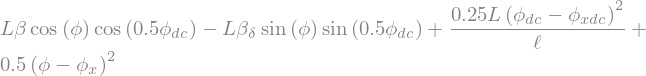

In [2]:
px, pxdc, ell, beta, dbeta, L, g = symbols('phi_x phi_xdc ell beta beta_delta L gamma', real=True)
p, pdc = var('phi phi_dc', real=True)


quadratic_p =  .5 * (p-px)**2
quadratic_pdc = .5* L/(2*ell)  * (pdc-pxdc)**2
beta_term = beta*L *cos(.5*pdc)*cos(p)
dbeta_term = -dbeta*L* sin(.5*pdc) * sin(p)


U = quadratic_p + quadratic_pdc + beta_term + dbeta_term

params1 = [[px,-.11],[pxdc,-2.5],[ell,1/24], [beta,6.2], [dbeta,.2], [L,1]]
U_sub = U.subs(params1)
U

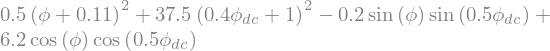

In [3]:
U_sub

## Execute the two cells above and then the two below for an interactive plot

In [4]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from ipywidgets import interactive
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

# use the function keyword arguments below to set default values
def f(pxv=0, pxdcv=-2.62, ev=.04, bv=6.2, dbv=0, Lv=1, contour=True):
    params = [[px,pxv],[pxdc,pxdcv],[ell,ev], [beta,bv], [dbeta,dbv], [L,Lv]]
    
    U_sub = U.subs(params).simplify()
    
    #SET THE PLOT WINDOW HERE ###
    #pmin, pmax, dcmin, dcmax = -7, 7, -9, -4.0
    #auto set window
    pmin, pmax, dcmin, dcmax = pxv-3, pxv+3, pxdcv-.5, pxdcv+.5

    
    resolution = 500
    
    X,Y = np.meshgrid( np.linspace(pmin, pmax, resolution), np.linspace(dcmin, dcmax, resolution))
    ft = lambdify((p,pdc), U_sub, 'numpy')

    F_ft = lambdify((p,pdc), exp(-U_sub))

    

    
    U_num = ft(X,Y)
    
    fig = plt.figure(figsize=(10,10))
    ax2 = fig.add_subplot(222, projection="3d")
    ax2.plot_wireframe(X,Y,U_num)
    ax3 = fig.add_subplot(221)
    ax3.contourf(X,Y,np.log(U_num), 20)
    
    print('left min:',np.min(U_num[:,:int(resolution/2)-80]),'right_min:',np.min(U_num[:,int(resolution/2)+80:]), 'central min:',np.min(U_num[:,int(resolution/2)-5:int(resolution/2)+5]))
    print('gamma:',Lv/(2*ev), 'beta:',Lv*bv, 'dbeta:', Lv*dbv)
    
#SET PARAMETER RANGES HERE ### 
xrng = (-1, 1, .001)
dcxrng = (-4, -2, .001)
erng = (0.01,1,.01)
brng = (0,10,.01)
dbrng = (-1,1,.01)
Lrng = (.001,4)
#SET PARAMETER RANGES HERE ### 


interactive_plot = interactive(f, pxv=xrng, pxdcv=dcxrng, ev=erng, bv=brng, dbv=dbrng, Lv=Lrng)
#output = interactive_plot.children[-1]
#output.layout.height = '900px'

In [5]:
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='pxv', max=1.0, min=-1.0, step=0.001), FloatSlider(va…